In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('ElephantsMF.csv')

In [72]:
data = data.drop(columns=['Unnamed: 0']) # в данных была лишняя колонка с индексом
data

,Age,Height,Sex
0,1.40,120.00,M
1,17.50,227.00,M
2,12.75,235.00,M
3,11.17,210.00,M
4,12.67,220.00,M
...,...,...,...
283,4.75,122.83,F
284,10.50,209.23,F
285,19.92,190.25,F
286,21.25,225.53,F


### О данных

Датасет содержит информацию о росте, поле и возрасте 288 африканских слонов, которые в течение первых двух лет жили в условиях засухи.

Датасет загружен с [Kaggle](https://www.kaggle.com/mostafaelseidy/elephantsmf)


Задачи:
* Подсчет пропущенных значений, оценка сбалансированности наблюдений 
* Построение гистограмм распределения возраста и роста в зависимости от пола
* Вычисление коэффициента корреляции связи роста и возраста в зависимости от пола
* Визуализация основных статистик данных


In [102]:
data.describe()

,Age,Height
count,288.000000,288.000000
mean,10.971319,187.683021
std,8.395486,50.603519
min,0.010000,75.460000
25%,4.580000,160.750000
50%,9.460000,200.000000
75%,16.500000,221.092500
max,32.170000,304.060000


In [104]:
data.isna().sum()

Age       0
Height    0
Sex       0
dtype: int64

**Пропущенных значений нет ни для одного из 288 наблюдений**

In [74]:
data['Sex'].value_counts(normalize=True)

F    0.520833
M    0.479167
Name: Sex, dtype: float64

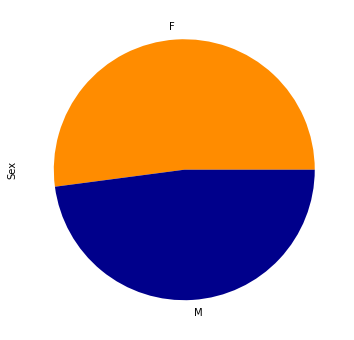

In [83]:
data['Sex'].value_counts(normalize=True).plot(kind='pie', figsize=(8, 6), colors=['darkorange', 'darkblue'])
plt.show()

**Распределение наблюдений по полу примерно равномерное**

### Скаттерплот распределения роста у слонов разного возраста

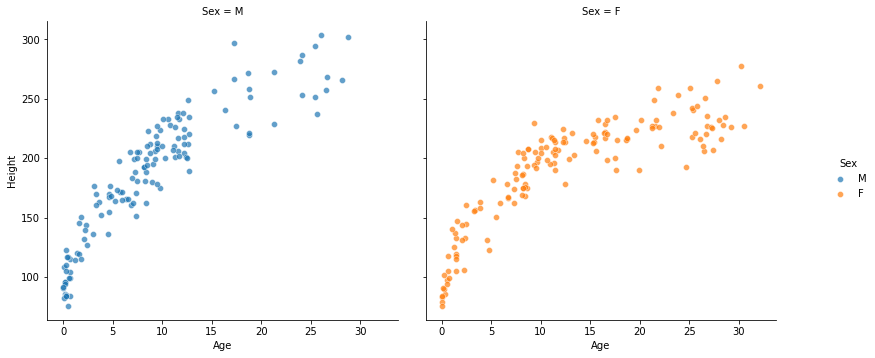

In [69]:
ax = sns.FacetGrid(data, col="Sex", hue='Sex')
ax.map(sns.scatterplot, 'Age', 'Height', alpha=.7)
ax.add_legend()
ax.fig.set_size_inches(13,6)

Распределение роста от веса у животных разных полов имеет похожую зависимость, чтобы сравнить два графика, удобнее расположить их на одних осях

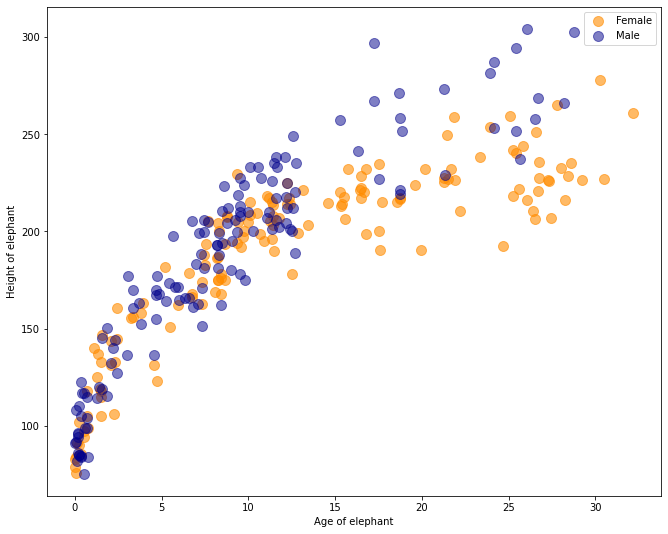

In [6]:
female_data = data[data['Sex']=='F']
male_data = data[data['Sex']=='M']

plt.figure(figsize=(11,9))
plt.scatter(female_data['Age'], female_data['Height'], s=100, c='darkorange', alpha=0.6, label='Female')
plt.scatter(male_data['Age'], male_data['Height'], s=100, c='darkblue', alpha=0.5, label='Male')
plt.ylabel('Height of elephant')
plt.xlabel('Age of elephant')
plt.legend()
plt.show()

Видно, что самцы после примерно 12 лет начинают обгонять самок по росту

## Построение карты корреляции признаков

In [99]:
print('Correlation for females:')
display(female_data.iloc[:,:2].corr())
print('='*20)
print('\nCorrelation for males:')
display(male_data.iloc[:,:2].corr())

Correlation for females:


,Age,Height
Age,1.00000,0.83854
Height,0.83854,1.00000



Correlation for males:


,Age,Height
Age,1.000000,0.898859
Height,0.898859,1.000000


Корреляция между признаками сильная, у самцов она выражена сильнее

### Гистограммы роста и возраста у слонов в зависимости от пола

<Figure size 864x864 with 0 Axes>

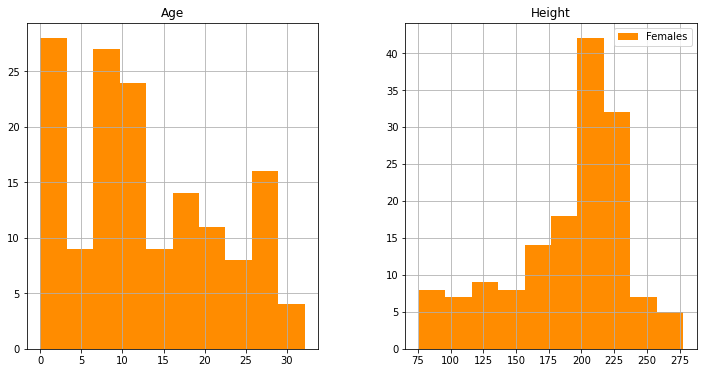

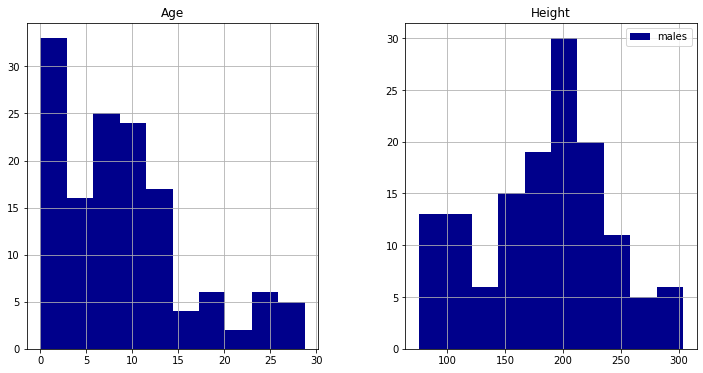

In [67]:
plt.figure(figsize=(12,12))
female_data.hist(color='darkorange', figsize=(12,6), label= 'Females')
plt.legend()
male_data.hist(color='darkblue', figsize=(12,6), label= 'males')
plt.legend()
plt.show()

Наблюдается смещение в распределении данных, распределение отличается от нормального. Видно, что в данных больше самок более преклонного возраста, чем самцов (старше 15 лет). 

Самки смещены по росту вправо, что значит, что в популяции больше более высоких слоних. 

### Визуализация основных статистик данных

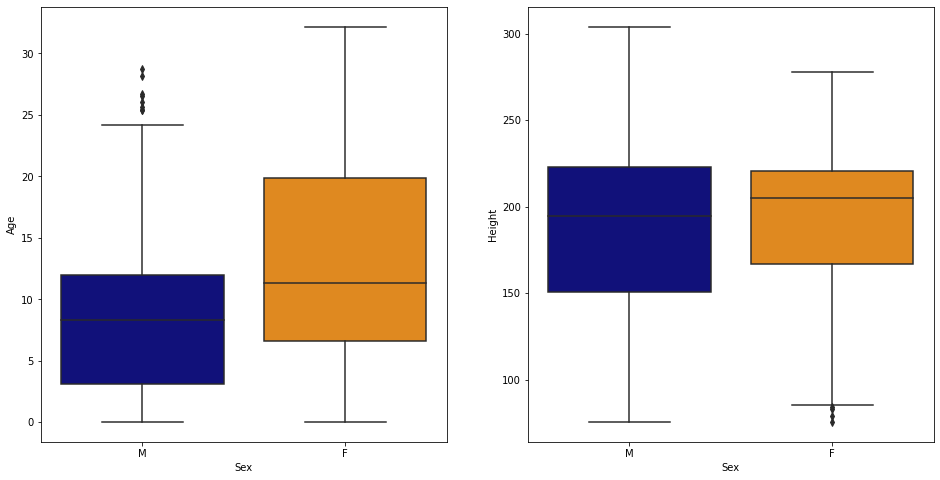

In [62]:
fig, ax =plt.subplots(1,2, figsize=(16, 8))
my_pal = {"M": "darkblue", "F": "darkorange"}
sns.boxplot(x=data['Sex'], y=data['Age'], ax=ax[0], palette=my_pal)
sns.boxplot(x=data['Sex'], y=data['Height'], ax=ax[1], palette=my_pal)
plt.show()

Видно, что самки в среднем живут дольше самцов (график слева), распределение по росту у них отличается статистически не значимо (график справа), раньше мы видели, что самцы слонов вырастают выше самок к 15 годам.